In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import plotly.express as px
import html

In [51]:
data_emissions = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
df = data_emissions[1] 
df.columns = ['country', 'co2_1990', 'co2_2005', 'co2_2017', 'world_percent_17', 'emmision_change_1990vs2017', 'per_land_area_2017', 'per_capita_2017', 'total_inc_lucf_2018', 'total_exc_lucf_2018']
df = df[df["country"].str.contains("World|European Union") == False] 
df.head()

,country,co2_1990,co2_2005,co2_2017,world_percent_17,emmision_change_1990vs2017,per_land_area_2017,per_capita_2017,total_inc_lucf_2018,total_exc_lucf_2018
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN


In [54]:
df["1990_rel_1990"]= df.loc[:,"co2_1990"] / df.loc[:,"co2_1990"] * 100
df["2005_rel_1990"]= df.loc[:,"co2_2005"] / df.loc[:,"co2_1990"] * 100
df["2017_rel_1990"]= df.loc[:,"co2_2017"] / df.loc[:,"co2_1990"] * 100
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,country,co2_1990,co2_2005,co2_2017,world_percent_17,emmision_change_1990vs2017,per_land_area_2017,per_capita_2017,total_inc_lucf_2018,total_exc_lucf_2018,1990_rel_1990,2005_rel_1990,2017_rel_1990
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44,100.0,41.751767,448.625295
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56,100.0,63.739936,76.348170
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67,100.0,149.515051,243.508382
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34,100.0,273.030251,527.704666
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN,100.0,233.333333,466.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86,100.0,491.680706,1083.782579
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN,100.0,157.638889,191.666667
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31,100.0,316.073762,181.544940
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74,100.0,83.147208,168.087986


In [56]:
df = df.sort_values(["2017_rel_1990"],ascending=False)
df

,country,co2_1990,co2_2005,co2_2017,world_percent_17,emmision_change_1990vs2017,per_land_area_2017,per_capita_2017,total_inc_lucf_2018,total_exc_lucf_2018,1990_rel_1990,2005_rel_1990,2017_rel_1990
81,Greenland,0.003,0.631,0.518,0.00%,"17,166.7%",0.0,9.2,NaN,NaN,100.0,21033.333333,17266.666667
34,Cambodia,0.407,2.686,10.560,0.03%,"2,494.6%",58.0,0.7,40.16,11.16,100.0,659.950860,2594.594595
62,Equatorial Guinea,0.097,3.371,2.469,0.01%,"2,445.4%",88.0,1.9,10.51,6.67,100.0,3475.257732,2545.360825
197,Turks and Caicos Islands,0.007,0.005,0.165,0.00%,"2,257.1%",174.0,4.7,NaN,NaN,100.0,71.428571,2357.142857
37,Cape Verde,0.049,0.227,0.955,0.00%,"1,849.0%",237.0,1.7,0.56,0.62,100.0,463.265306,1948.979592
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Georgia,34.745,4.979,11.558,0.03%,-66.7%,166.0,3.0,9.46,9.46,100.0,14.330119,33.265218
141,North Korea,131.365,79.568,37.774,0.10%,-71.2%,313.0,1.5,21.41,18.12,100.0,60.570167,28.754996
199,Ukraine,783.210,354.429,205.723,0.55%,-73.7%,341.0,4.7,173.18,185.37,100.0,45.253380,26.266646
128,Moldova,31.957,8.139,8.263,0.02%,-74.1%,244.0,2.0,8.70,8.59,100.0,25.468598,25.856620


In [57]:
head_df = df.head(3)
head_df = head_df.append(df.tail(3))
head_df


,country,co2_1990,co2_2005,co2_2017,world_percent_17,emmision_change_1990vs2017,per_land_area_2017,per_capita_2017,total_inc_lucf_2018,total_exc_lucf_2018,1990_rel_1990,2005_rel_1990,2017_rel_1990
81,Greenland,0.003,0.631,0.518,0.00%,"17,166.7%",0.0,9.2,NaN,NaN,100.0,21033.333333,17266.666667
34,Cambodia,0.407,2.686,10.560,0.03%,"2,494.6%",58.0,0.7,40.16,11.16,100.0,659.950860,2594.594595
62,Equatorial Guinea,0.097,3.371,2.469,0.01%,"2,445.4%",88.0,1.9,10.51,6.67,100.0,3475.257732,2545.360825
199,Ukraine,783.210,354.429,205.723,0.55%,-73.7%,341.0,4.7,173.18,185.37,100.0,45.253380,26.266646
128,Moldova,31.957,8.139,8.263,0.02%,-74.1%,244.0,2.0,8.70,8.59,100.0,25.468598,25.856620
10,Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,5.59,5.55,100.0,21.943089,23.344123


<Figure size 432x288 with 0 Axes>

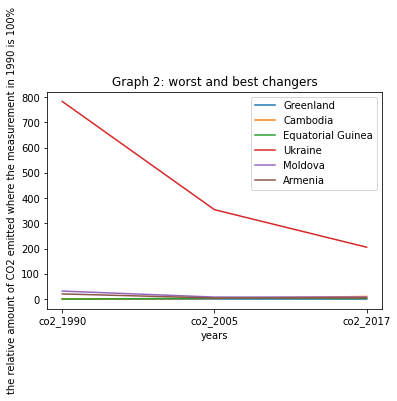

In [58]:
fig = plt.figure()
fig, ax = plt.subplots()
years = head_df.columns[1:4]

for index, row in head_df.iterrows():
   plt.plot(years, row[1:4], label = row[0])

plt.title("Graph 2: worst and best changers")
plt.xlabel("years")
plt.ylabel("the relative amount of CO2 emitted where the measurement in 1990 is 100%")
ax.legend()
